C:\Users\jewel\AppData\Local\Temp\ipykernel_26404\2284069157.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.set_xticklabels(category_prices.index, rotation=45)
C:\Users\jewel\AppData\Local\Temp\ipykernel_26404\2284069157.py:122: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


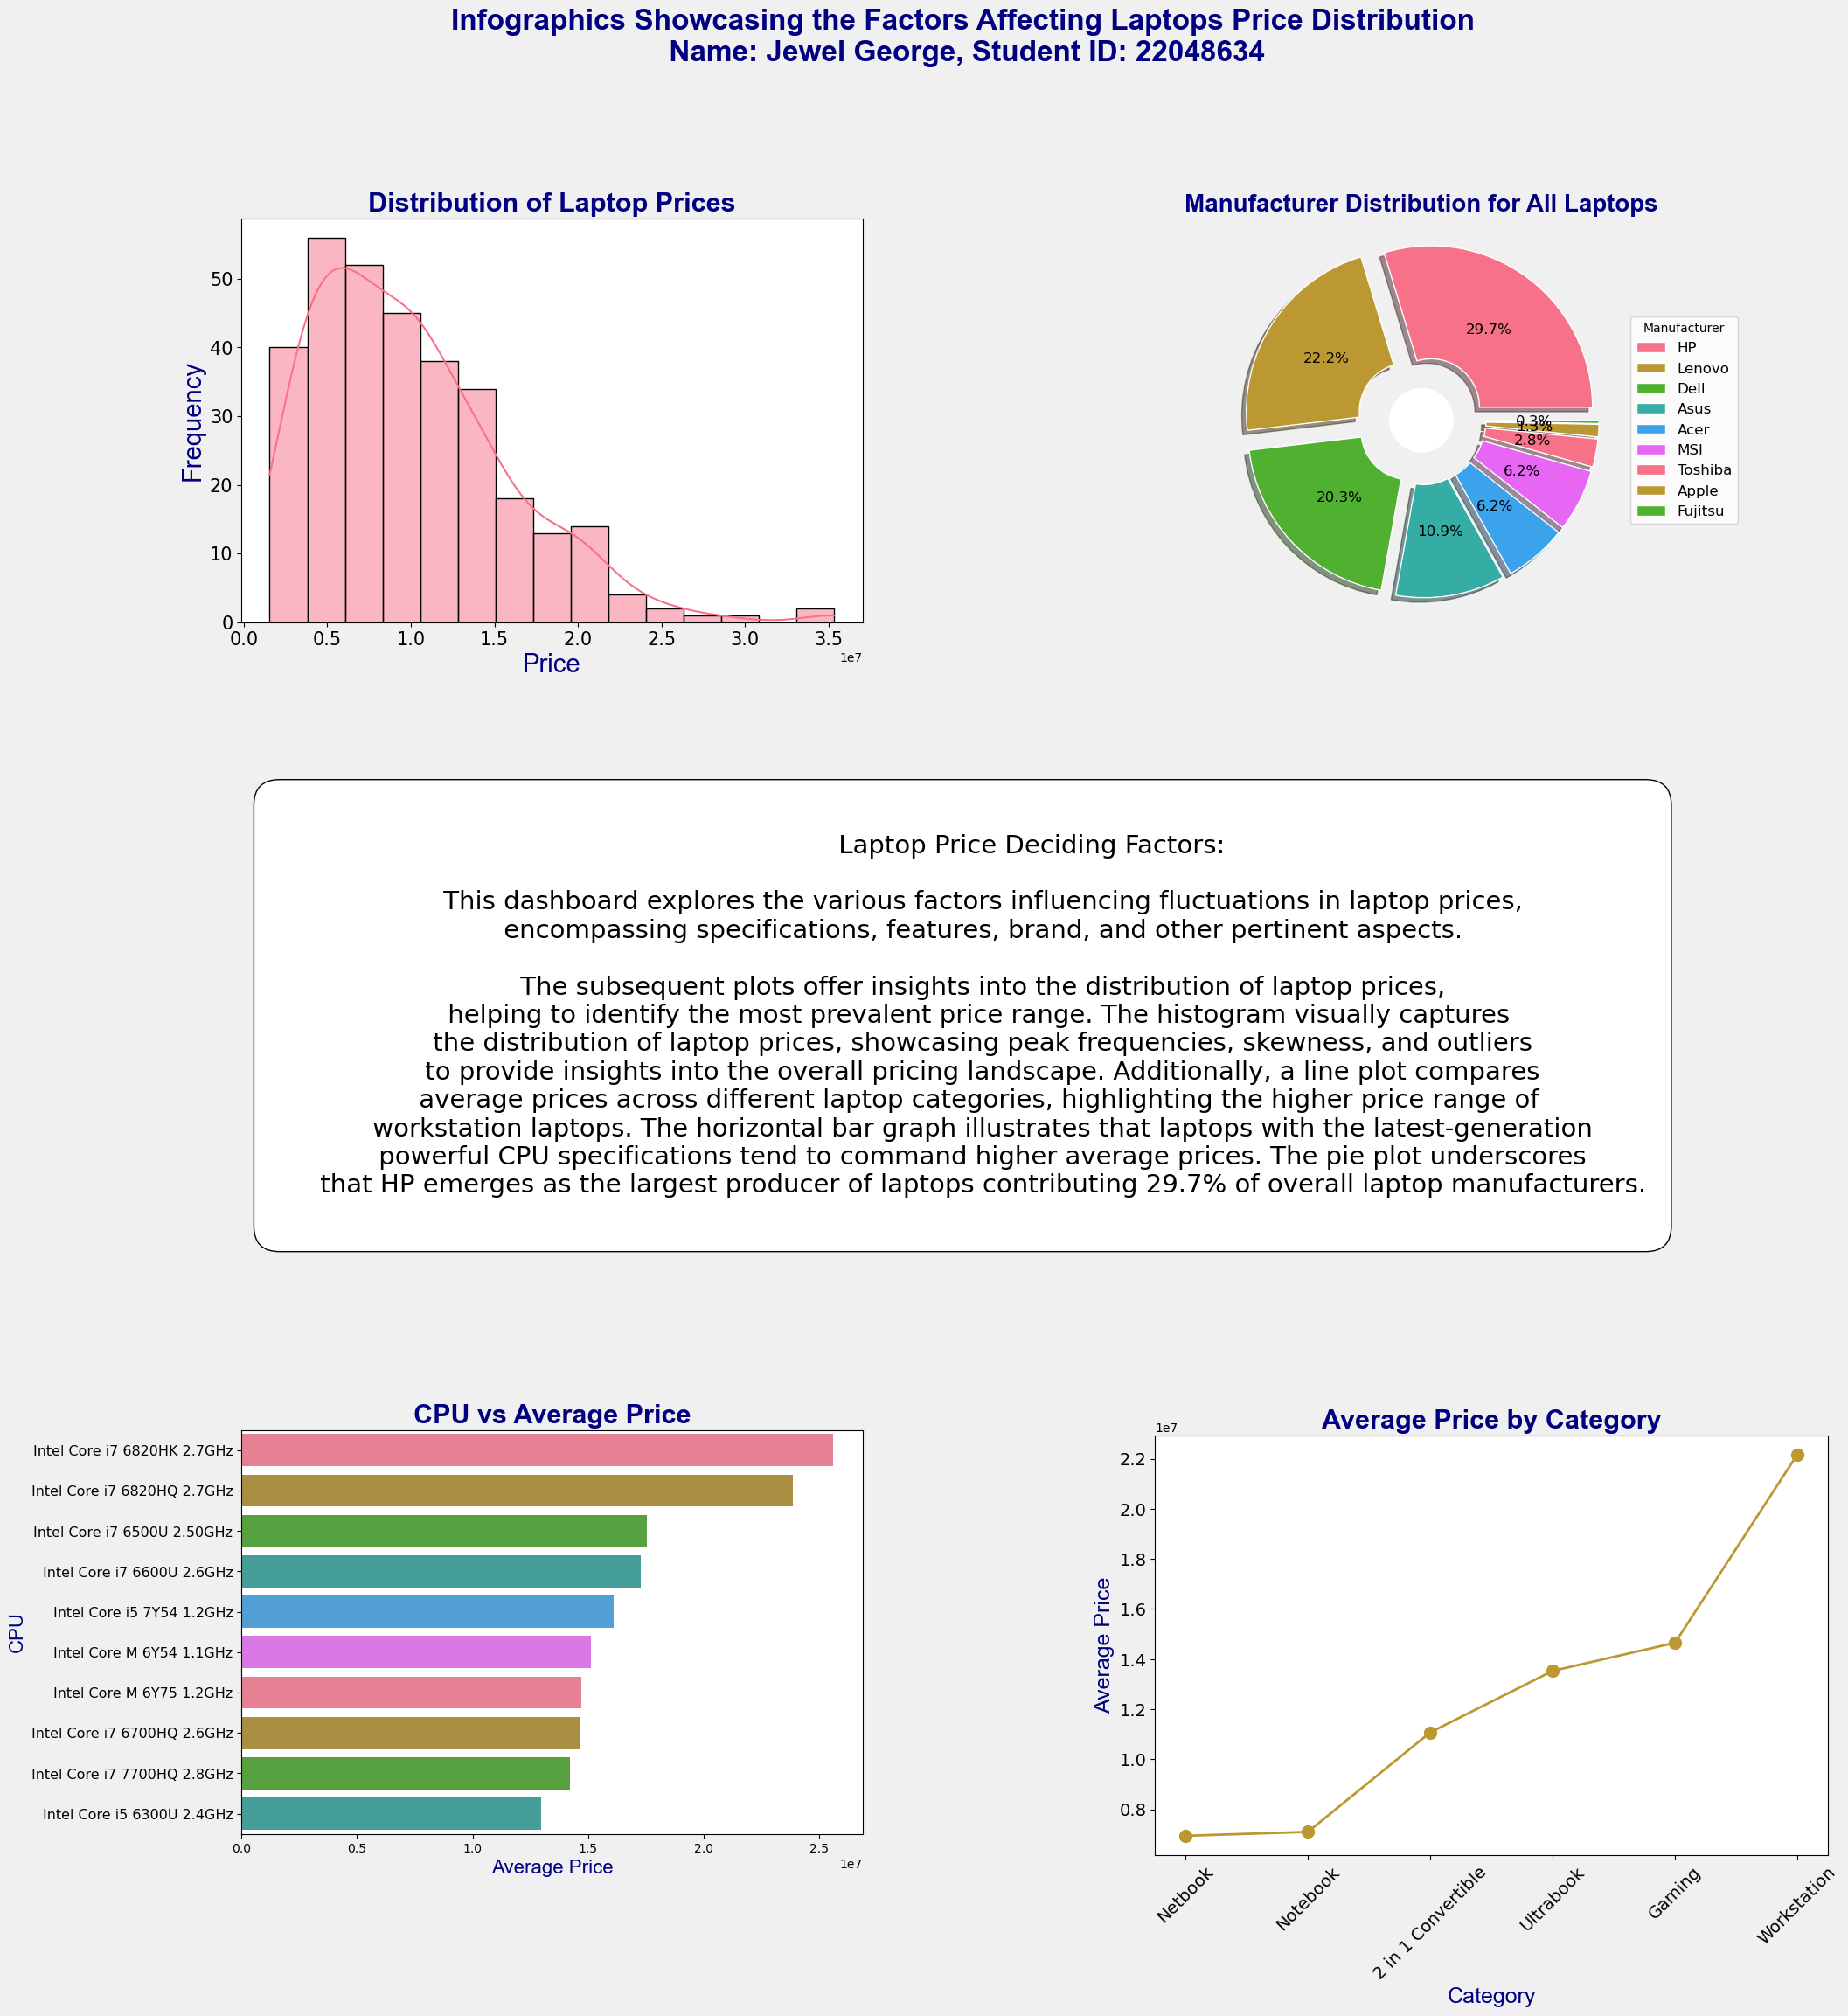

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

# Define a professional color palette
color_palette = sns.color_palette("husl")

# Read the CSV file
data = pd.read_csv('laptops_test.csv')

# Remove specified laptop manufacturers for clarity
exclude_manufacturers = ["Vero", "Razer", "Fujitzu", "Samsung"]
data_filtered = data[~data["Manufacturer"].isin(exclude_manufacturers)]

# Plotting the figure with professional styling
# Light gray background
fig = plt.figure(figsize=(22, 24), facecolor='#f0f0f0')
grid = gridspec.GridSpec(3, 2, wspace=0.4, hspace=0.5)

# Heading given to the dashboard
fig.suptitle("Infographics Showcasing the Factors Affecting Laptops Price Distribution"
             '\n Name: Jewel George, Student ID: 22048634\n',
             fontsize=24, fontweight='bold', fontname='Arial', color='navy')

# Text grid
# Adding textbox
explanation = '''
                 Laptop Price Deciding Factors:
                  
     This dashboard explores the various factors influencing fluctuations in laptop prices,
     encompassing specifications, features, brand, and other pertinent aspects.

     The subsequent plots offer insights into the distribution of laptop prices,
     helping to identify the most prevalent price range. The histogram visually captures 
     the distribution of laptop prices, showcasing peak frequencies, skewness, and outliers
     to provide insights into the overall pricing landscape. Additionally, a line plot compares
     average prices across different laptop categories, highlighting the higher price range of 
     workstation laptops. The horizontal bar graph illustrates that laptops with the latest-generation
     powerful CPU specifications tend to command higher average prices. The pie plot underscores
     that HP emerges as the largest producer of laptops contributing 29.7% of overall laptop manufacturers.
'''

# The position of the textbox is defined by (left, bottom, width, height)
textbox = plt.figtext(0.50, 0.50, explanation, fontsize=21, wrap=True, ha='center',
                      va='center', bbox=dict(facecolor='white', edgecolor='black',
                                             boxstyle='round,pad=1'))

# Pie Chart with exploded slices
ax1 = fig.add_subplot(grid[0, 1], aspect='equal', title="Manufacturers")

# Explode each slice for separation
manufacturer_percentages = data_filtered["Manufacturer"].value_counts(
    normalize=True) * 100
explode = [0.1] * len(manufacturer_percentages)

# Plotting the Pie Chart with exploded slices and shadow
patches, texts, autotexts = ax1.pie(manufacturer_percentages, labels=None, autopct="%1.1f%%",
                                    textprops={'fontsize': 'large'},
                                    colors=color_palette, wedgeprops=dict(
                                        width=0.7, edgecolor='w'),
                                    explode=explode, shadow=True)
# Add a white circle in the middle
ax1.add_artist(plt.Circle((0, 0), 0.2, fc='white'))

# Add a legend
ax1.legend(patches, manufacturer_percentages.index, title="Manufacturer",
           loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize='large')
ax1.set_title('Manufacturer Distribution for All Laptops',
              fontsize=20, fontweight='bold', fontname='Arial', color='navy')

# Modified Histogram
ax2 = fig.add_subplot(grid[0, 0])

# Extract the 'Price' column
price_data = data_filtered['Price']

# Use seaborn for histogram
sns.histplot(price_data, bins=15, kde=True,
             color=color_palette[0], edgecolor='black')

ax2.set_xlabel('Price', fontsize=21, fontname='Arial', color='navy')
ax2.set_ylabel('Frequency', fontsize=21, fontname='Arial', color='navy')
ax2.set_title('Distribution of Laptop Prices', weight='bold',
              fontsize=22, fontname='Arial', color='navy')
ax2.tick_params(axis='x', labelsize=15)
ax2.tick_params(axis='y', labelsize=15)

# Line Plot
ax5 = fig.add_subplot(grid[1, 0])

category_prices = data_filtered.groupby(
    'Category')['Price'].mean().sort_values()

ax5.plot(category_prices.index, category_prices.values, marker='o',
         markersize=10, color=color_palette[1], linewidth=2)
ax5.set_xlabel('Category', fontsize=18, fontname='Arial', color='navy')
ax5.set_ylabel('Average Price', fontsize=18, fontname='Arial', color='navy')
ax5.set_title('Average Price by Category', weight='bold',
              fontsize=22, fontname='Arial', color='navy')
ax5.set_xticklabels(category_prices.index, rotation=45)
ax5.set_position([0.6, 0.1, 0.35, 0.2])
ax5.tick_params(axis='x', labelsize=14)
ax5.tick_params(axis='y', labelsize=14)

# Horizontal Bar Plot
ax4 = fig.add_subplot(grid[2, 0])

cpu_prices = data_filtered[['CPU', 'Price']].groupby('CPU').agg(
    'mean').sort_values('Price', ascending=False).reset_index()

sns.barplot(data=cpu_prices.head(10), x='Price', y='CPU',
            ax=ax4, palette=color_palette, orient='h')
ax4.set_title('CPU vs Average Price', weight='bold',
              fontsize=22, fontname='Arial', color='navy')
ax4.set_ylabel('CPU', fontsize=16, fontname='Arial', color='navy')
ax4.set_xlabel('Average Price', fontsize=16, fontname='Arial', color='navy')
ax4.tick_params(axis='y', labelsize=11.5)

# Adjust the layout and spacing
fig.tight_layout()

# show figure
plt.show()